In [1]:
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading in the attractions dataset
attraction_df = pd.read_csv('../dataset/cb_objekwisata.csv', sep = ',', encoding='ISO-8859-1')

In [3]:
#Loading in the ratings dataset
ratings_df = pd.read_csv('../dataset/data-rating-objek-wisata.csv', sep = ',', encoding='ISO-8859-1')

In [4]:
#Rename the columns in the ratings dataset
ratings_df.columns = ['id_user','nama', 'username', 'rating', 'tanggal', 'nama_objek','id_objek']

In [5]:
#Rename the columns in the attractions dataset
attraction_df.columns = ['id_objek','nama_objek', 'type']

In [6]:
#Create a seperate indexing column as we cannot use attraction_id
attraction_df['List Index'] = attraction_df.index
attraction_df.head()

,id_objek,nama_objek,type,List Index
0,999,AEON Mall BSD City,TEMPAT BELANJA,0
1,998,Agrowisata Teba Sari Bali,WISATA ALAM & TAMAN,1
2,997,Air Panas Banjar,WISATA ALAM & TAMAN,2
3,996,Air Terjun Aling-Aling,WISATA ALAM & TAMAN,3
4,995,Air Terjun Benang Stokal and Benang Kelambu,WISATA ALAM & TAMAN,4


In [7]:
attraction_type = attraction_df['type'].unique()
attraction_type = pd.DataFrame(attraction_type).reset_index()
attraction_type.columns = ['List Index','type']
attraction_type

,List Index,type
0,0,TEMPAT BELANJA
1,1,WISATA ALAM & TAMAN
2,2,TRANSPORTASI
3,3,PEMANDANGAN & TENGARA
4,4,SUMBER INFORMASI WISATAWAN
5,5,LAINNYA
6,6,TAMAN AIR & TAMAN HIBURAN
7,7,KEBUN BINATANG & AKUARIUM
8,8,KONSER & PERTUNJUKAN
9,9,MUSEUM


In [8]:
# Now we can merge the ratings into the movies one so that we the index value in both dataframes
# Merge attractions with ratings by nama_objek as foriegn key
merge_data_x = attraction_df.merge(ratings_df, on='nama_objek')

In [9]:
merge_data = merge_data_x.groupby(['type','id_user','nama','username'])['rating'].max().reset_index()
merge_data = merge_data.merge(attraction_type, on='type')
merge_data['rating'].unique()

array([4, 3, 5, 1, 2])

In [10]:
print(len(merge_data))

29813


In [11]:
merge_data.head()

,type,id_user,nama,username,rating,List Index
0,KEBUN BINATANG & AKUARIUM,243,@De_Wrahesti,/Profile/dwrahest,4,7
1,KEBUN BINATANG & AKUARIUM,257,_adetamb65,/Profile/_adetamb65,3,7
2,KEBUN BINATANG & AKUARIUM,259,_annaafifah01,/Profile/_annaafifah01,4,7
3,KEBUN BINATANG & AKUARIUM,262,_eggypras,/Profile/304egip,4,7
4,KEBUN BINATANG & AKUARIUM,292,11fael,/Profile/11fael,4,7


In [12]:
GroupUser = merge_data.groupby('username')
print(GroupUser)

In [13]:
#Formatting the data for input output into the RBM

In [14]:
print(len(GroupUser))

21310


In [15]:
GroupUser.head()

,type,id_user,nama,username,rating,List Index
0,KEBUN BINATANG & AKUARIUM,243,@De_Wrahesti,/Profile/dwrahest,4,7
1,KEBUN BINATANG & AKUARIUM,257,_adetamb65,/Profile/_adetamb65,3,7
2,KEBUN BINATANG & AKUARIUM,259,_annaafifah01,/Profile/_annaafifah01,4,7
3,KEBUN BINATANG & AKUARIUM,262,_eggypras,/Profile/304egip,4,7
4,KEBUN BINATANG & AKUARIUM,292,11fael,/Profile/11fael,4,7
...,...,...,...,...,...,...
29807,WISATA ALAM & TAMAN,20937,????????? ?????????,/Profile/Parshutinka,3,1
29808,WISATA ALAM & TAMAN,20938,?????? ?,/Profile/_K5605KX,3,1
29809,WISATA ALAM & TAMAN,20939,??????? ?,/Profile/microsolnce,1,1
29811,WISATA ALAM & TAMAN,20941,?? ?,/Profile/Explore654821,3,1


In [36]:
#No. of users in training
Users = 21310
#create list
list_idx = []
#for each user in the group
for id_user, UserCurrent in GroupUser:
    #Temp variable that stores every attraction's rating
    temporary = [0]*len(attraction_type)
    #For Each attraction in the curUser's attraction list
    for num, attraction in UserCurrent.iterrows():
        #Divide ratings by 5 and store it
        temporary[attraction['List Index']] = attraction['rating']/5.0 
    
    #Now add the list of ratings into the training list
    list_idx.append(temporary)
    #Check to see if we finished adding in the amount of users for training
    if Users == 0:
        break
    Users -= 1

In [37]:
print(list_idx)

, 0.8], [0.6, 0, 0, 0.6, 0, 0, 0, 0, 0, 0], [0.8, 0, 0, 0.6, 0, 0, 0, 0, 0, 0.8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8], [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.8, 0, 1.0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8], [0, 0.8, 0, 0.8, 0, 0, 0, 0, 0, 0], [0, 0.8, 0, 0, 0, 0, 0, 0, 0, 0.6], [0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0], [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0], [0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8], [0, 0, 0, 0.8, 0, 0, 0, 0, 0, 0], [0, 0.6, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.8, 0, 0, 0, 0, 0, 0, 0, 0], [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.8, 0, 0, 0, 0, 0, 0], [0, 1.0, 0, 1.0, 0, 0, 0, 0, 0, 0], [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0], [0.8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.8, 0, 0, 0, 0, 0.8, 0.8, 0, 0, 0], [0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.8, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.8, 0, 0, 0, 0, 0, 0], [0, 1.0, 0, 0, 0, 0, 0

In [38]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [19]:
# Building an RBM with Tf

In [39]:
#Arbitrary
unit_hidden = 20 
unit_visible = len(attraction_type)
#No. of unique attraction
v_b = tf.placeholder("float", [unit_visible])
#no. of features 
h_b = tf.placeholder("float", [unit_hidden]) 
Weight = tf.placeholder("float", [unit_visible, unit_hidden])

In [40]:
print(v_b)

Tensor("Placeholder_4:0", shape=(10,), dtype=float32)


In [22]:
# create visible and hidden layer units and set their activation function use sigmoid and relu functions

In [41]:
# Input Preprocessing
v_0 = tf.placeholder("float", [None, unit_visible])
_h0 = tf.nn.sigmoid(tf.matmul(v_0, Weight) + h_b)
h_0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

#Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h_0, tf.transpose(Weight)) + v_b)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h_1 = tf.nn.sigmoid(tf.matmul(v1, Weight) + h_b)

In [42]:
print(Weight)

Tensor("Placeholder_6:0", shape=(10, 20), dtype=float32)


In [25]:
# set rbm training parameters

In [43]:
#learning rate
Alpa = 0.1
#create gradients
P_W_Gradients = tf.matmul(tf.transpose(v_0), h_0)
N_W_Gradients = tf.matmul(tf.transpose(v1), h_1)

#calculate contrastive divergence to maximize
contrastive_divergence = (P_W_Gradients - N_W_Gradients) / tf.to_float(tf.shape(v_0)[0])

#create methods to update the weights and biases
update_weight = Weight+ Alpa*contrastive_divergence
update_visibleBias = v_b + Alpa*tf.reduce_mean(v_0 - v1, 0)
update_hiddenBias = h_b + Alpa*tf.reduce_mean(h_0 - h_1, 0)

In [44]:
#set error function - RMSE
error = v_0 - v1
sum_error = tf.sqrt(tf.reduce_mean(error * error))

In [45]:
#initialze variables
#Current weight
curren_weight = np.zeros([unit_visible, unit_hidden], np.float32)
#Current visible unit biases
current_visibleBias = np.zeros([unit_visible], np.float32)
#Current hidden unit biases
cur_hiddenBias = np.zeros([unit_hidden], np.float32)
#Previous weight
previous_weight = np.zeros([unit_visible, unit_hidden], np.float32)
#Previous visible unit biases
previous_visibleBias = np.zeros([unit_visible], np.float32)
#Previous hidden unit biases
previous_hiddenBias = np.zeros([unit_hidden], np.float32)
session = tf.Session()
session.run(tf.global_variables_initializer())

In [73]:
v_0

<tf.Tensor 'Placeholder_7:0' shape=(?, 10) dtype=float32>

In [29]:
#Train RBM with 10 epochs 

0.45555523
0.42238826
0.4100312
0.4047394
0.4023066
0.39989182
0.39708322
0.39906132
0.39697686
0.39777514


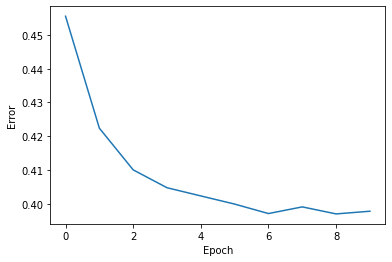

In [46]:
epochs = 10
batchsize = 1000
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(list_idx), batchsize), range(batchsize, len(list_idx), batchsize)):
        batch = list_idx[start:end]
        curren_weight = session.run(update_weight, feed_dict={v_0: batch, Weight: previous_weight, v_b: previous_visibleBias, h_b: previous_hiddenBias})
        current_visibleBias = session.run(update_visibleBias, feed_dict={v_0: batch, Weight: previous_weight, v_b: previous_visibleBias, h_b: previous_hiddenBias})
        cur_nb = session.run(update_hiddenBias, feed_dict={v_0: batch, Weight: previous_weight, v_b: previous_visibleBias, h_b: previous_hiddenBias})
        previous_weight = curren_weight
        previous_visibleBias = current_visibleBias
        previous_hiddenBias = cur_nb
    errors.append(session.run(sum_error, feed_dict={v_0: list_idx, Weight: curren_weight, v_b: current_visibleBias, h_b: cur_nb}))
    print (errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [47]:
def rmse(er):
    return np.sqrt((np.array(er) ** 2).mean())

In [48]:
rmse(errors)

0.40894824

In [49]:
userInput = [list_idx[1]]

In [50]:
#Feeding in the user and reconstructing the input
h_h0 = tf.nn.sigmoid(tf.matmul(v_0, Weight) + h_b)
v_v1 = tf.nn.sigmoid(tf.matmul(h_h0, tf.transpose(Weight)) + v_b)
feedding = session.run(h_h0, feed_dict={ v_0: userInput, Weight: previous_weight, h_b: previous_hiddenBias})
reconstruction = session.run(v_v1, feed_dict={ h_h0: feedding, Weight: previous_weight, v_b: previous_visibleBias})

In [60]:
attractions_scored_user = attraction_type
attractions_scored_user["Recommendation Score"] = reconstruction[0]
attractions_scored_user.sort_values(["Recommendation Score"], ascending=False).head(20)

,List Index,type,Recommendation Score
1,1,WISATA ALAM & TAMAN,0.485706
3,3,PEMANDANGAN & TENGARA,0.278563
0,0,TEMPAT BELANJA,0.159261
9,9,MUSEUM,0.089571
6,6,TAMAN AIR & TAMAN HIBURAN,0.072761
7,7,KEBUN BINATANG & AKUARIUM,0.024998
5,5,LAINNYA,0.022373
2,2,TRANSPORTASI,0.013957
4,4,SUMBER INFORMASI WISATAWAN,0.010551
8,8,KONSER & PERTUNJUKAN,0.009178


In [61]:
db = GroupUser.head()

def recommendation(uid):
    df = db[db['id_user'] == uid][['List Index','rating']]
    df['rating'] = df['rating']/5
    dx = attraction_type['List Index']
    dx = pd.DataFrame(dx)
    dn = pd.Series(df.rating.values,index=df['List Index']).to_dict()
    dx['rating'] = dx['List Index'].map(dn).fillna(0)
    userInput = [dx['rating'].tolist()]
    h_h0 = tf.nn.sigmoid(tf.matmul(v_0, Weight) + h_b)
    v_v1 = tf.nn.sigmoid(tf.matmul(h_h0, tf.transpose(Weight)) + v_b)
    feedding = session.run(h_h0, feed_dict={ v_0: userInput, Weight: previous_weight, h_b: previous_hiddenBias})
    reconstruction = session.run(v_v1, feed_dict={ h_h0: feedding, Weight: previous_weight, v_b: previous_visibleBias})
    attractions_scored_user = attraction_type
    attractions_scored_user["Recommendation Score"] = reconstruction[0]
    return attractions_scored_user.sort_values(["Recommendation Score"], ascending=False).head(20)

In [62]:
from random import randint
n = randint(0,len(db['id_user'].unique()))
random_user = db['id_user'].unique()[n]
print('Rekomendasi Objek Pariwisata untuk user dengan id: ', random_user)
recommendation(random_user)

Rekomendasi Objek Pariwisata untuk user dengan id:  13427


,List Index,type,Recommendation Score
1,1,WISATA ALAM & TAMAN,0.485207
3,3,PEMANDANGAN & TENGARA,0.280348
0,0,TEMPAT BELANJA,0.161419
9,9,MUSEUM,0.091516
6,6,TAMAN AIR & TAMAN HIBURAN,0.074480
7,7,KEBUN BINATANG & AKUARIUM,0.025920
5,5,LAINNYA,0.023223
2,2,TRANSPORTASI,0.014560
4,4,SUMBER INFORMASI WISATAWAN,0.011042
8,8,KONSER & PERTUNJUKAN,0.009616


In [63]:
len(db['id_user'].unique())

20573

In [64]:
db['id_user'].unique()[300]

7364

In [65]:
recommendation(1815)

,List Index,type,Recommendation Score
1,1,WISATA ALAM & TAMAN,0.486763
3,3,PEMANDANGAN & TENGARA,0.275307
0,0,TEMPAT BELANJA,0.155328
9,9,MUSEUM,0.086064
6,6,TAMAN AIR & TAMAN HIBURAN,0.069672
7,7,KEBUN BINATANG & AKUARIUM,0.023373
5,5,LAINNYA,0.020877
2,2,TRANSPORTASI,0.012904
4,4,SUMBER INFORMASI WISATAWAN,0.009696
8,8,KONSER & PERTUNJUKAN,0.008417


In [66]:
len(list_idx)

21310

In [67]:
len(db['id_user'].unique())

20573